# Passive degrees of freedom



Passive dofs!

In [1]:
from bloptools.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

running iteration 1 / 1
finding points with acquisition function "quasi-random" ...
found points [[-4.6025968   2.155033  ]
 [ 3.5595293  -2.3154202 ]
 [ 0.7221308   4.414996  ]
 [-2.3707054  -4.899207  ]
 [-0.32757616  3.1129332 ]
 [ 1.5110612  -2.6509902 ]
 [ 4.367343    0.37564087]
 [-2.539364   -0.23202944]
 [-3.651843    3.7736769 ]
 [ 4.5191298  -4.2563295 ]
 [ 2.2979202   1.5121536 ]
 [-0.78606415 -1.674099  ]
 [-1.2814178   0.9376488 ]
 [ 0.54715157 -0.7979722 ]
 [ 2.7885408   3.678874  ]
 [-4.128238   -3.2129962 ]] with acqf quasi-random in 0.0 seconds (obj = None)


Transient Scan ID: 1     Time: 2023-11-08 23:56:26
Persistent Unique Scan ID: 'a22d31fa-5e85-4bac-b91d-f010a365920d'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian1 |  brownian2 |         x3 |
+-----------+------------+------------+------------+------------+------------+------------+
| 

|         2 | 23:56:27.0 |     -0.786 |     -1.674 |      0.025 |     -0.207 |      0.000 |


|         3 | 23:56:27.5 |     -4.128 |     -3.213 |      0.229 |     -0.283 |      0.000 |


|         4 | 23:56:28.0 |     -2.371 |     -4.899 |      0.465 |     -0.286 |      0.000 |


|         5 | 23:56:28.5 |      1.511 |     -2.651 |      0.422 |     -0.284 |      0.000 |


|         6 | 23:56:28.9 |      4.519 |     -4.256 |      0.667 |     -0.053 |      0.000 |


|         7 | 23:56:29.4 |      3.560 |     -2.315 |      0.718 |     -0.206 |      0.000 |


|         8 | 23:56:29.8 |      4.367 |      0.376 |      0.796 |      0.074 |      0.000 |


|         9 | 23:56:30.2 |      2.298 |      1.512 |      1.101 |      0.138 |      0.000 |


|        10 | 23:56:30.7 |      2.789 |      3.679 |      1.059 |      0.142 |      0.000 |


|        11 | 23:56:31.1 |      0.722 |      4.415 |      1.161 |      0.158 |      0.000 |


|        12 | 23:56:31.5 |     -0.328 |      3.113 |      1.264 |      0.187 |      0.000 |


|        13 | 23:56:32.0 |     -1.281 |      0.938 |      1.483 |      0.082 |      0.000 |


|        14 | 23:56:32.4 |     -2.539 |     -0.232 |      1.803 |     -0.019 |      0.000 |


|        15 | 23:56:32.9 |     -4.603 |      2.155 |      1.552 |     -0.053 |      0.000 |


|        16 | 23:56:33.3 |     -3.652 |      3.774 |      1.468 |      0.121 |      0.000 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['a22d31fa'] (scan num: 1)


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


trained models in 0.2 seconds


('a22d31fa-5e85-4bac-b91d-f010a365920d',)

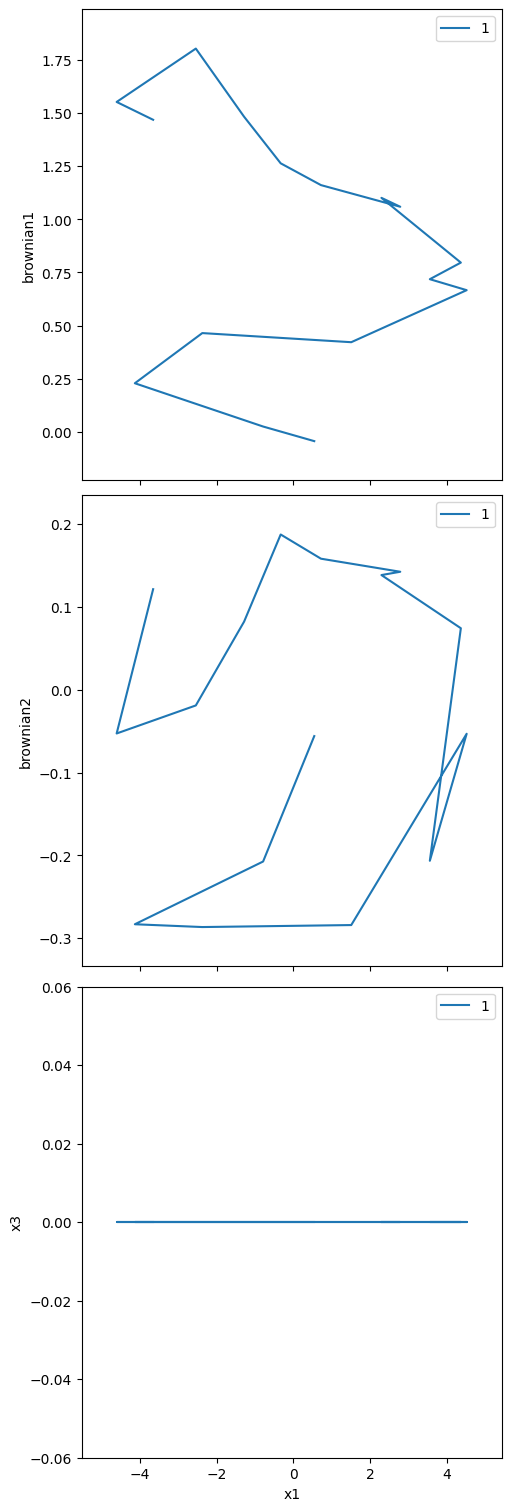

In [2]:
from bloptools.utils import functions
from bloptools.bayesian import DOF, Agent, BrownianMotion, Objective


dofs = [
    DOF(name="x1", limits=(-5.0, 5.0)),
    DOF(name="x2", limits=(-5.0, 5.0)),
    DOF(name="x3", limits=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(key="himmelblau", minimize=True),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=functions.constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

In [3]:
agent.dofs

          description  readback  lower_limit  upper_limit units  active  \
x1                    -3.651843         -5.0          5.0  None    True   
x2                     3.773677         -5.0          5.0  None    True   
x3                     0.000000         -5.0          5.0  None   False   
brownian1              1.145647        -10.0         10.0  None    True   
brownian2              0.470496        -10.0         10.0  None   False   

           read_only tags  
x1             False   []  
x2             False   []  
x3             False   []  
brownian1       True   []  
brownian2       True   []  

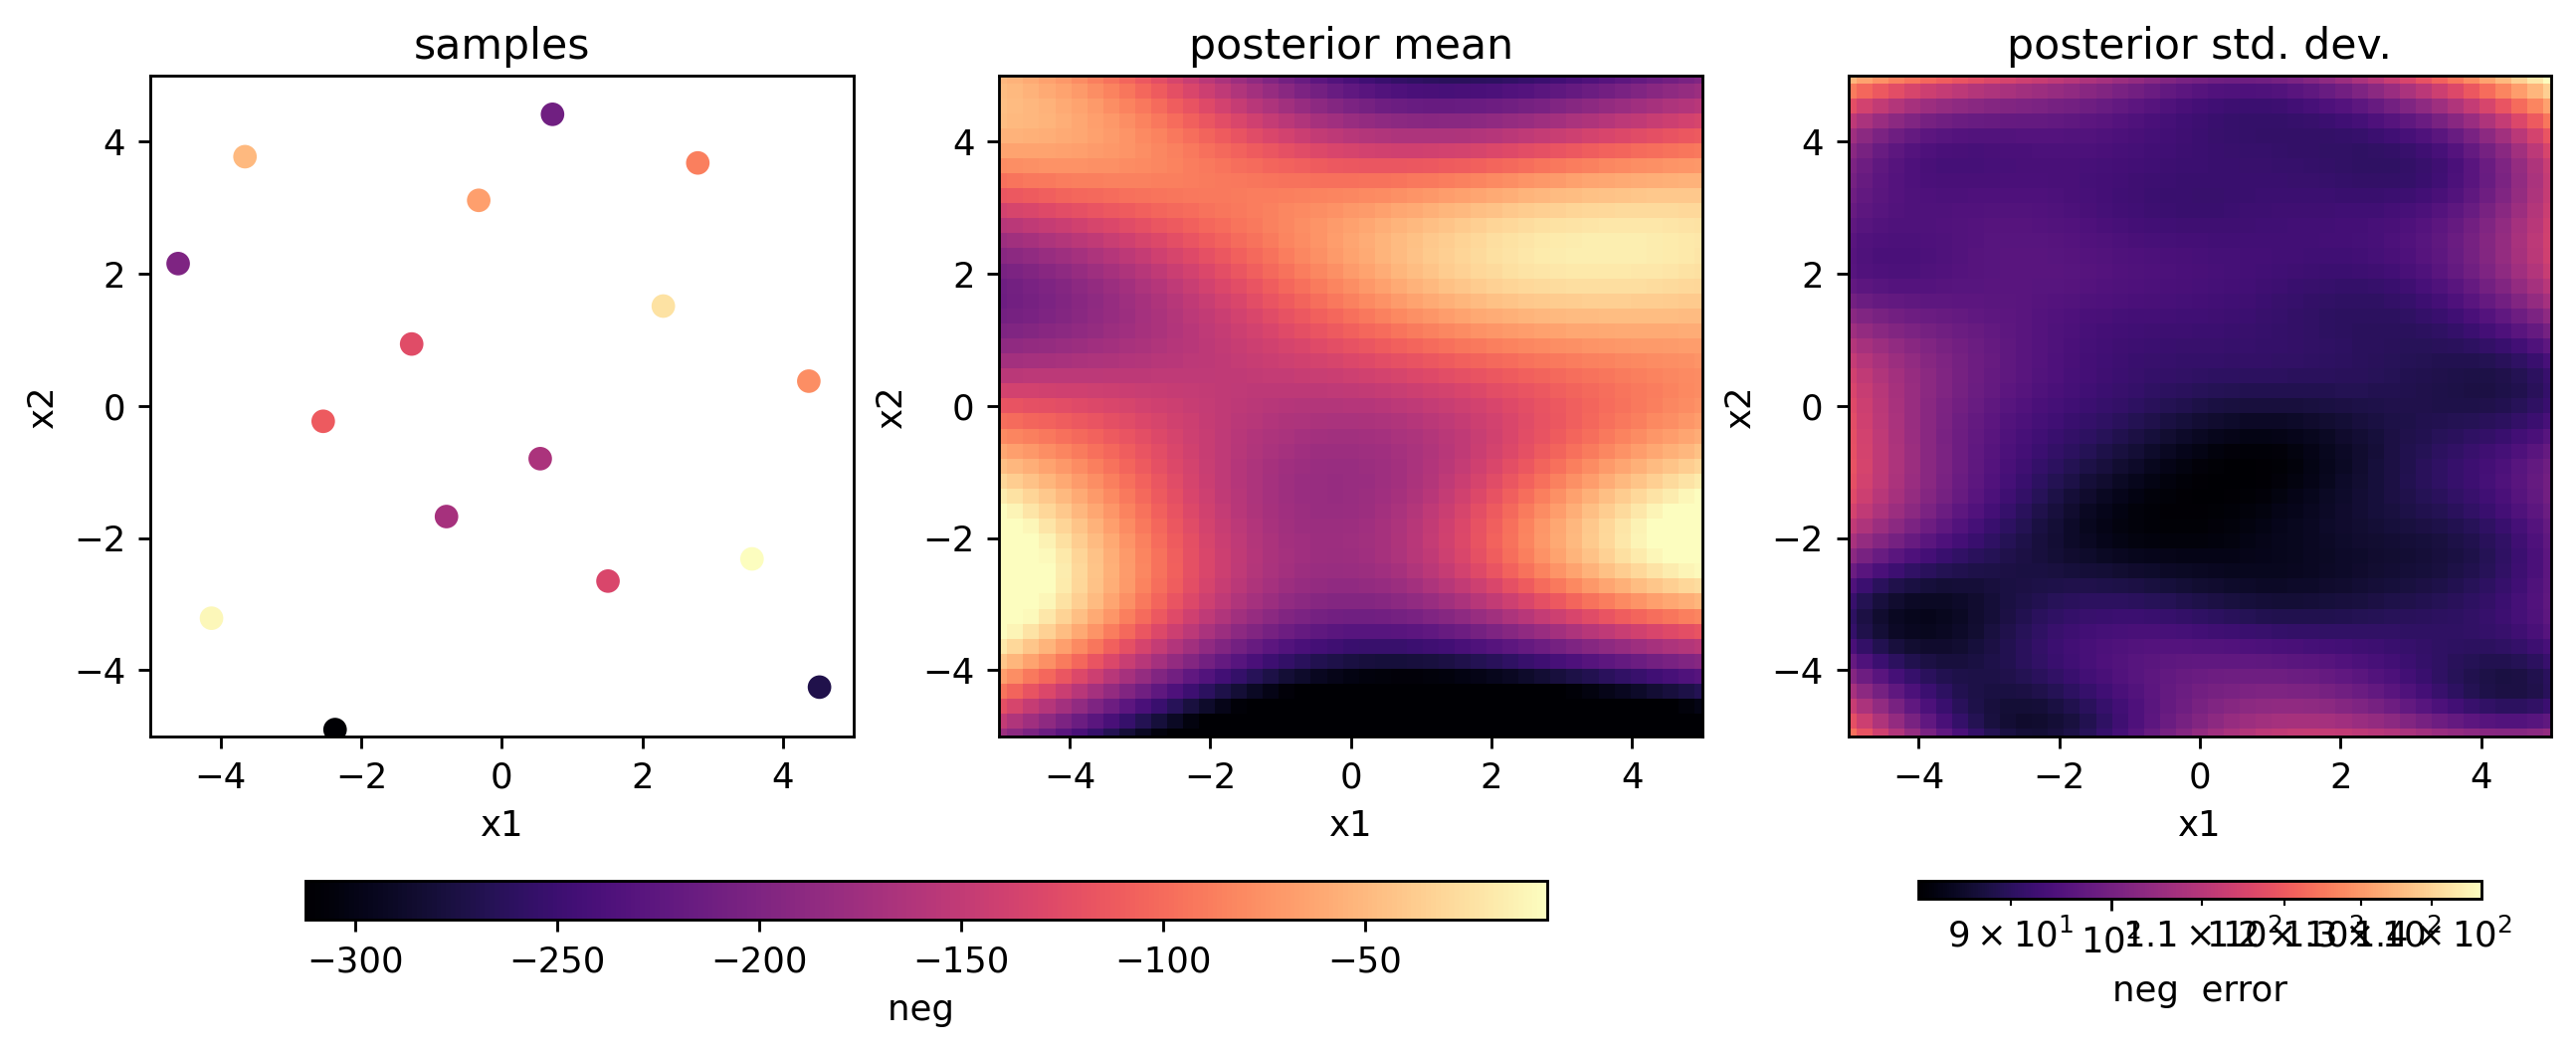

In [4]:
agent.plot_objectives()